## 1. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data (Data Collection)

In [2]:
waist_data=pd.read_csv('..\\may 5 batch codes\\Data files\\WC_AT.csv')

In [3]:
waist_data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
waist_data.shape

(109, 2)

In [5]:
waist_data.isna().sum()

Waist    0
AT       0
dtype: int64

In [6]:
waist_data.dtypes

Waist    float64
AT       float64
dtype: object

### 3.2 Perform Assumption Test

#### 3.2.1 Linearity Test

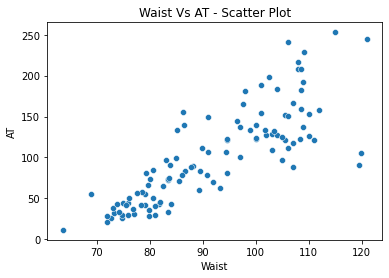

In [7]:
sns.scatterplot(x='Waist', y='AT', data=waist_data)
plt.title('Waist Vs AT - Scatter Plot')
plt.show()

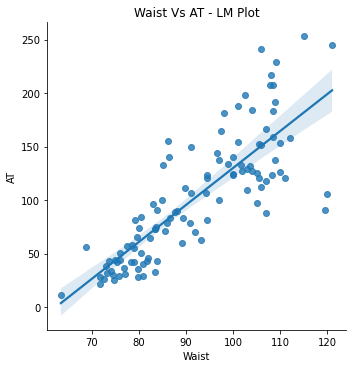

In [8]:
sns.lmplot(x='Waist', y='AT', data=waist_data)
plt.title('Waist Vs AT - LM Plot')
plt.show()

Linearity Test Failed

#### 3.2.2 Normality Test

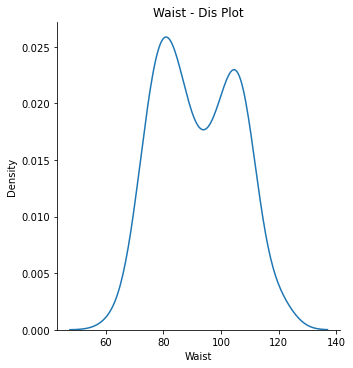

In [9]:
sns.displot(data= waist_data, x='Waist',kind='kde')
plt.title('Waist - Dis Plot')
plt.show()

Normality Test Failed

#### 3.2.3 No Multicollinearity Test

Can't be checked here because there is only one input feature

#### 3.2.4 No Auto Regression Test

Here we don't have feature with datetime datatype.

#### 3.2.5 Homoscedasticity || 3.2.6 Zero Residual Mean

This can be performed only after Model Training

## 4. Data Preparation

In [10]:
waist_data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


## 5. Model Building || 6. Model Training

Linear Regression can be built by below 2 Methods

1. Statsmodels
2. Sklearn

#### Using Statsmodels

In [11]:
statmodel=smf.ols('AT~Waist',data=waist_data).fit()

In [12]:
statmodel.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [13]:
statmodel.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [14]:
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.62e-27
Time:                        11:58:42   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. Model Testing

In [15]:
x_test = pd.DataFrame(data={'Waist':[60,70,80]})

In [16]:
x_test

,Waist
0,60
1,70
2,80


In [17]:
statmodel.predict(x_test)

0    -8.449924
1    26.138669
2    60.727263
dtype: float64

## 8. Model Evaluation

** **park** **

## 9. Model Deployment

In [21]:
dump(obj=statmodel,file=open('intelligence_file2.pkl','wb'))

In [22]:
loaded_file = load(open('intelligence_file2.pkl','rb'))

In [23]:
loaded_file.predict(x_test)

0    -8.449924
1    26.138669
2    60.727263
dtype: float64

## 10. Comments

Since P value is less than 0.5, It is significantly correct.

## End